In [4]:
import pyedflib
import numpy as np

def read_edf_signals(edf_file):
    f = pyedflib.EdfReader(edf_file)
    num_signals = f.signals_in_file
    signals = []
    for i in range(num_signals):
        signal = f.readSignal(i)
        signals.append(signal)

    labels = f.getSignalLabels()
    sampling_rates = f.getSampleFrequencies()

    f.close()
    
    return signals, labels, sampling_rates

edf_file_path = "./dataset/files/ucddb002.rec"
signals, labels, sampling_rates = read_edf_signals(edf_file_path)

print("Signal labels:", labels)
print("Sampling rates:", sampling_rates)

print("First 10 samples of the first signal:", signals[0][:10]) 

# Imp signals -> 'Flow', 'ribcage'

Signal labels: ['Lefteye', 'RightEye', 'EMG', 'C3A2', 'C4A1', 'ECG', 'SpO2', 'Sound', 'Flow', 'Sum', 'ribcage', 'abdo', 'BodyPos', 'Pulse']
Sampling rates: [ 64.  64.  64. 128. 128. 128.   8.   8.   8.   8.   8.   8.   8.   8.]
First 10 samples of the first signal: [0.55873016 0.64664225 0.74432234 0.84981685 1.03150183 1.11159951
 1.14090354 0.98852259 0.88107448 0.81074481]


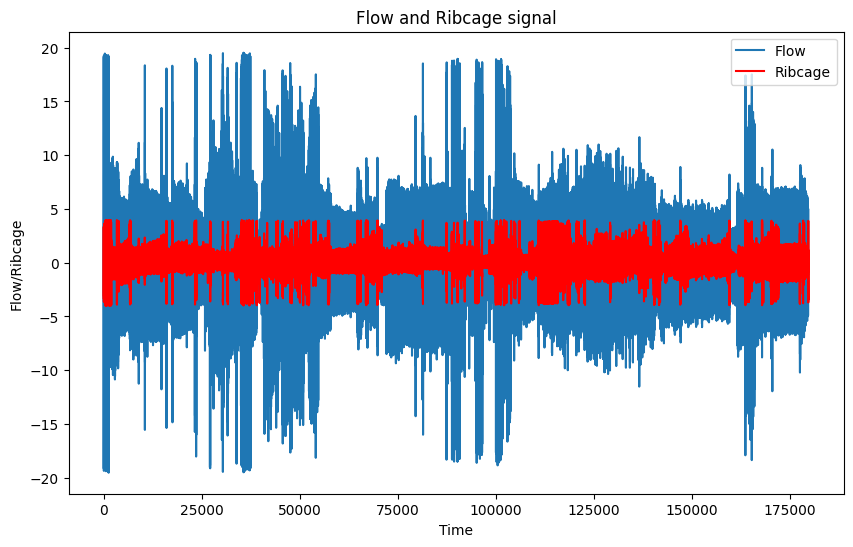

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(10, 6))
plt.plot(signals[8])
plt.plot(signals[10], 'r')
plt.xlabel('Time')
plt.ylabel('Flow/Ribcage')
plt.title('Flow and Ribcage signal')
plt.legend(['Flow', 'Ribcage'])

Shape of signals: (179760,)


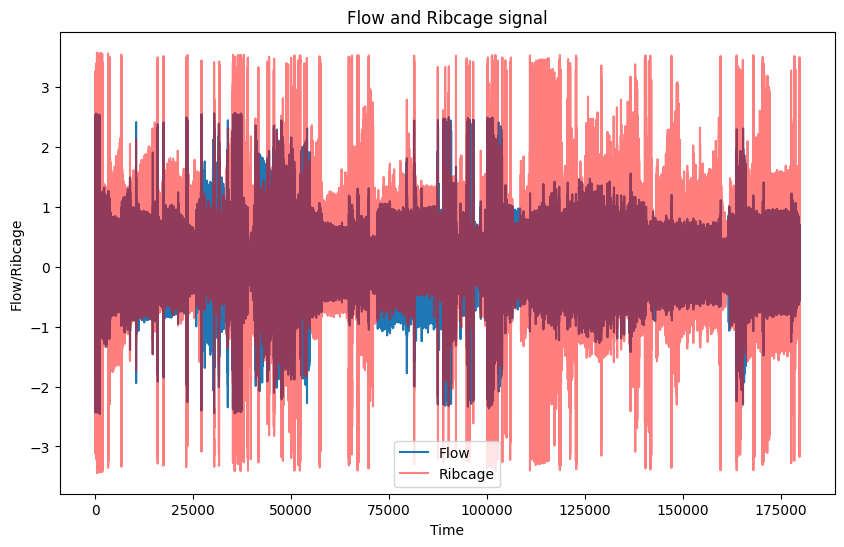

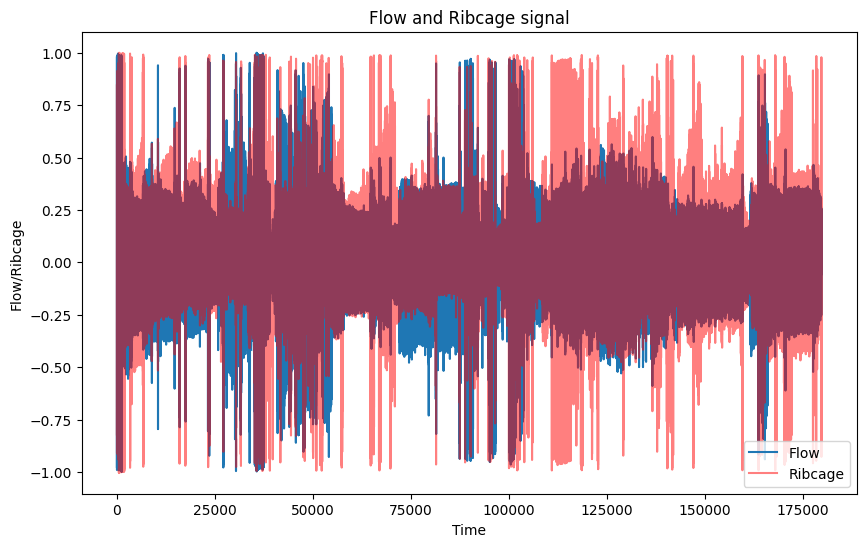

In [6]:
import numpy as np
from sklearn.preprocessing import RobustScaler


print("Shape of signals:", signals[8].shape)
signals_stacked = np.column_stack([signals[8], signals[10]])

scaler = RobustScaler()
scaled_signals = scaler.fit_transform(signals_stacked)

flow_scaled = scaled_signals[:, 0]
ribcage_scaled = scaled_signals[:, 1]

# normalizer = Normalizer()
# X2 = normalizer.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.plot(flow_scaled)
plt.plot(ribcage_scaled, 'r', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Flow/Ribcage')
plt.title('Flow and Ribcage signal')
plt.legend(['Flow', 'Ribcage'])


plt.figure(figsize=(10, 6))
plt.plot(signals[8]/np.max(signals[8]))
plt.plot(signals[10]/np.max(signals[10]), 'r', alpha=0.5)   
plt.xlabel('Time')
plt.ylabel('Flow/Ribcage')
plt.title('Flow and Ribcage signal')
plt.legend(['Flow', 'Ribcage'])

-------------------------------------------------------------------------------------------
Distribution of sleep stages in all the files:
2 (array([0, 1, 2, 3, 4, 5]), array([121, 155, 213, 172,  29,  58], dtype=int64))
3 (array([0, 1, 2, 3, 4, 5]), array([168, 190, 106, 254,  51, 113], dtype=int64))
5 (array([0, 1, 2, 3, 4, 5]), array([309, 125,  89, 251,   8,  44], dtype=int64))
6 (array([0, 1, 2, 3, 4, 5]), array([ 92, 192, 181,  95,  49, 199], dtype=int64))
7 (array([0, 1, 2, 3, 4, 5]), array([ 84, 132,  56, 414,  39,  88], dtype=int64))
8 (array([0, 1, 2, 3, 4, 5, 8]), array([263,  33,  76, 302,  46,  37,  11], dtype=int64))
9 (array([0, 1, 2, 3, 4, 5]), array([190,  89, 261, 244,  25, 116], dtype=int64))
10 (array([0, 1, 2, 3, 4, 5]), array([ 74, 169, 120, 465,  32,  47], dtype=int64))
11 (array([0, 1, 2, 3, 4, 5]), array([356,  42,  89, 295,  52,  66], dtype=int64))
12 (array([0, 1, 2, 3, 4, 5]), array([129, 194,  58, 337,  31, 115], dtype=int64))
13 (array([0, 1, 2, 3, 4, 5]),

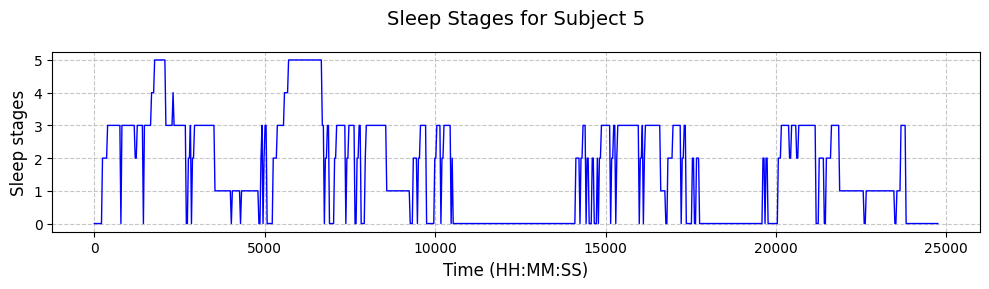

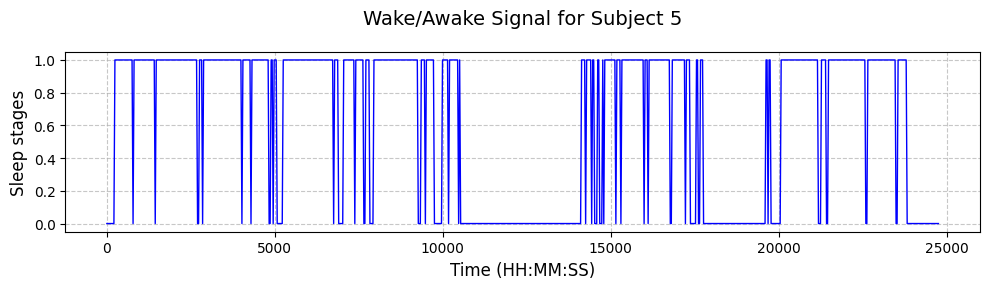

In [7]:
print("-------------------------------------------------------------------------------------------")
print("Distribution of sleep stages in all the files:")
for i in range(2, 10):
    try:
        sleep_stages_ = np.loadtxt(f"dataset/files/ucddb00{i}_stage.txt", dtype=int)
    except:
        continue
    print(i, np.unique(sleep_stages_, return_counts=True))


for i in range(1, 29):
    try:
        sleep_stages_ = np.loadtxt(f"dataset/files/ucddb0{i}_stage.txt", dtype=int)
    except:
        continue
    print(i, np.unique(sleep_stages_, return_counts=True))
print("-------------------------------------------------------------------------------------------")


sleep_stages_label = np.loadtxt(f"idk/files/ucddb005_stage.txt", dtype=int)
sleep_stages_label
times = pd.Index(np.arange(0, len(sleep_stages_label) * 30, 30))

fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(times, sleep_stages_label, color='blue', label='Wake/Awake', linewidth=1)
ax.set_xlabel('Time (HH:MM:SS)', fontsize=12)
ax.set_ylabel('Sleep stages', fontsize=12)
ax.set_title('Sleep Stages for Subject 5', fontsize=14, pad=20)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#---------------------------------------------------
# Note: 0 denotes awake
fig, ax = plt.subplots(figsize=(10, 3))
wake_awake_label_signal = (sleep_stages_label > 0).astype(int)
np.unique(wake_awake_label_signal, return_counts=True)

ax.plot(times, wake_awake_label_signal, color='blue', label='Wake/Awake', linewidth=1)

ax.set_xlabel('Time (HH:MM:SS)', fontsize=12)
ax.set_ylabel('Sleep stages', fontsize=12)
ax.set_title('Wake/Awake Signal for Subject 5', fontsize=14, pad=20)

ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
x_list = []
y_list = []

for i in range(2, 29):
    try:
        if i<10:
            sleep_stages = np.loadtxt(f"dataset/files/ucddb00{i}_stage.txt", dtype=int)
            edf_file_path = f"./dataset/files/ucddb00{i}.rec"
            signals, labels, sampling_rates = read_edf_signals(edf_file_path)
        else:
            sleep_stages = np.loadtxt(f"dataset/files/ucddb0{i}_stage.txt", dtype=int)
            edf_file_path = f"./dataset/files/ucddb0{i}.rec"
            signals, labels, sampling_rates = read_edf_signals(edf_file_path)

        signals_stacked = np.column_stack([signals[8], signals[10]])
        scaler = RobustScaler()
        scaled_signals = scaler.fit_transform(signals_stacked)
        flow_scaled = scaled_signals[:, 0]
        ribcage_scaled = scaled_signals[:, 1]

        flow_scaled = flow_scaled[:len(sleep_stages)*240]
        ribcage_scaled = ribcage_scaled[:len(sleep_stages)*240]

        sleep_stages_remove_indices = []
        signal_remove_indices = []
        for j in range(len(sleep_stages)):
            if sleep_stages[j] == 8:
                sleep_stages_remove_indices.append(j)
                _indices = np.arange(j*240, (j+1)*240)
                signal_remove_indices.extend(_indices)
        
        flow_scaled = np.delete(flow_scaled, signal_remove_indices)
        ribcage_scaled = np.delete(ribcage_scaled, signal_remove_indices)
        sleep_stages = np.delete(sleep_stages, sleep_stages_remove_indices)

        reshaped1 = flow_scaled.reshape(-1, 240)
        reshaped2 = ribcage_scaled.reshape(-1, 240)

        sleep_stages = sleep_stages.reshape(-1, 1)
        flow_ribcage = np.stack([reshaped1, reshaped2], axis=1)
        x_list.append(flow_ribcage)
        y_list.append(sleep_stages)
    except:
        print(f"Error in file {i}")
        continue

print("-------------------------------------------------------------------------------------------")
for i in range(len(x_list)):
     print(f"File {i} has {len(x_list)} signals", \
        "\nsamples [nasal, ribcage]", f"[{len(signals[8])}, {len(signals[10])}]", \
        "\nsampling rate [nasal, ribcage]", f"[{sampling_rates[8]}, {sampling_rates[10]}]",\
        "\nno of sleep stages", len(x_list[i])* len(x_list[0][1][0])/(30*sampling_rates[8]), len(x_list[i])* len(x_list[0][1][0])/(30*sampling_rates[10]),  \
        "\nSleep stages: ", len(y_list[i])) 
     print()



Error in file 4
Error in file 16
-------------------------------------------------------------------------------------------
File 0 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 748.0 748.0 
Sleep stages:  748

File 1 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 882.0 882.0 
Sleep stages:  882

File 2 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 826.0 826.0 
Sleep stages:  826

File 3 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 808.0 808.0 
Sleep stages:  808

File 4 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 813.0 813.0 
Sleep stages:  813

File 5 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
samp

In [9]:
print(y_list[0].shape, x_list[0].shape)

(748, 1) (748, 2, 240)


In [10]:
y_binary_list = []
for i in range(len(y_list)):
    y_binary = (y_list[i] > 0).astype(int)
    y_binary_list.append(y_binary)

In [11]:
y_3_stage_list = []
for i in range(len(y_list)):
    # 0 -> wake, 1 -> REM, 2,3,4,5 -> NREM
    y_3_stage = np.zeros_like(y_list[i])
    y_3_stage[y_list[i] == 1] = 1 # REM
    y_3_stage[y_list[i] == 2] = 2
    y_3_stage[y_list[i] == 3] = 2
    y_3_stage[y_list[i] == 4] = 2
    y_3_stage[y_list[i] == 5] = 2

    # 0 -> wake, 1 -> REM, 2 -> NREM
    y_3_stage_list.append(y_3_stage)

In [12]:
y_4_stage_list = []
for i in range(len(y_list)):
    # 0 -> wake, 1 -> REM, 2,3 -> Light Sleep, 4,5 -> Deep Sleep
    y_4_stage = np.zeros_like(y_list[i])
    y_4_stage[y_list[i] == 1] = 1 # REM
    y_4_stage[y_list[i] == 2] = 2
    y_4_stage[y_list[i] == 3] = 2
    y_4_stage[y_list[i] == 4] = 3
    y_4_stage[y_list[i] == 5] = 3

    # 0 -> wake, 1 -> REM, 2 -> Light Sleep, 3 -> Deep Sleep

    y_4_stage_list.append(y_4_stage)

In [13]:
print(np.unique(y_3_stage_list[0], return_counts=True))
print(np.unique(y_binary_list[0], return_counts=True))
print(np.unique(y_4_stage_list[0], return_counts=True))
np.unique(y_list[0], return_counts=True)

(array([0, 1, 2]), array([121, 155, 472], dtype=int64))
(array([0, 1]), array([121, 627], dtype=int64))
(array([0, 1, 2, 3]), array([121, 155, 385,  87], dtype=int64))


(array([0, 1, 2, 3, 4, 5]), array([121, 155, 213, 172,  29,  58], dtype=int64))

In [14]:
binary_subject_wise_data = list(zip(x_list, y_binary_list))
for i, data in enumerate(binary_subject_wise_data):
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

In [15]:
len(binary_subject_wise_data)

25

In [16]:
X_train = np.vstack(x_list[:-1])
Y_train = np.vstack(y_binary_list[:-1])


X_test = x_list[-1]
Y_test = y_binary_list[-1]
# Xdata.shape, Ydata.shape

In [17]:


X_train.shape, Y_train.shape

((20053, 2, 240), (20053, 1))

In [18]:
np.unique(Y_train, return_counts=True)

(array([0, 1]), array([ 4479, 15574], dtype=int64))

In [20]:
X_train.shape, Y_train.shape

((20053, 2, 240), (20053, 1))

In [18]:
classes, counts = np.unique(Y_train, return_counts=True)
print("Class frequencies:", dict(zip(classes.tolist(), counts.tolist())))
# For example, it might print: {0: 16000, 1: 4000}
total_samples = len(Y_train)
num_classes = len(classes)
# Weight formula: total_samples / (num_classes * count)
class_weights = [total_samples / (num_classes * count.item()) for count in counts]
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
print("Class weights:", class_weights_tensor)

Class frequencies: {0: 4479, 1: 15574}


NameError: name 'torch' is not defined

In [ ]:
!jupyter nbconvert --to script [YOUR_NOTEBOOK].ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.


In [19]:
print("Unique values in Y_train:", np.unique(Y_train))
print("Unique values in Y_test:", np.unique(Y_test))


Unique values in Y_train: [0 1]
Unique values in Y_test: [0 1]


In [22]:
from aeon.classification.convolution_based import RocketClassifier, MiniRocketClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

clf = MiniRocketClassifier(n_jobs=-1)
clf.fit(X_train, Y_train.reshape(-1))
y_pred = clf.predict(X_test)



KeyboardInterrupt: 

In [3]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy="auto", random_state=42)
# X_train_resampled, Y_train_resampled = smote.fit_resample(X_train.reshape(X_train.shape[0], -1), Y_train.reshape(-1))

# clf = MiniRocketClassifier(n_jobs=-1)
# clf.fit(X_train_resampled.reshape(-1, 2, 240), Y_train_resampled)


# y_pred = clf.predict(X_test)

# accuracy = accuracy_score(Y_test.reshape(-1), y_pred)
# print("Accuracy:", accuracy)
# cm = confusion_matrix(Y_test.reshape(-1), y_pred)
# print("Confusion Matrix:")
# print(cm)

# # plot confusion matrix
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")

In [24]:
Y_test.shape, y_pred.shape

((721, 1), (721,))

In [46]:
!pip install tsaug


In [55]:
import numpy as np
from tsaug import TimeWarp, Crop, Quantize, Drift
from collections import Counter

# Define augmentation strategy
augmenter = TimeWarp() * 3  # Apply time warping augmentation 3 times

# Identify the minority class
# class_counts = Counter(Y_train.l)
minority_class = 0
# print(f"Minority class: {minority_class}, Count: {class_counts[minority_class]}")

# Extract minority class samples
X_minority = X_train[Y_train.ravel() == minority_class]
y_minority = Y_train[Y_train.ravel() == minority_class]

# Augment only the minority class
X_augmented = augmenter.augment(X_minority)
y_augmented = np.full(X_augmented.shape[0], minority_class)  # Label them correctly
print(f"Augmented data shape: {X_augmented.shape} {y_augmented.shape}")
print(Y_test.shape, Y_train.ravel().shape)  
# Combine original data with augmented data
X_balanced = np.vstack((X_train, X_augmented))
y_balanced = np.hstack((Y_train.ravel(), y_augmented))

# Print new class distribution
new_class_counts = Counter(y_balanced)
print(f"New dataset shape: {X_balanced.shape}")
print(f"Balanced class distribution: {new_class_counts}")

Augmented data shape: (13437, 2, 240) (13437,)
(721, 1) (20053,)
New dataset shape: (33490, 2, 240)
Balanced class distribution: Counter({0: 17916, 1: 15574})


In [64]:
from aeon.classification.deep_learning import InceptionTimeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

inctime = InceptionTimeClassifier(n_epochs=10,batch_size=256, verbose=1, n_classifiers=2, metrics=['accuracy'])  
# inctime.fit(X_train, Y_train.reshape(-1))
inctime.fit(X_balanced, y_balanced.reshape(-1))

y_pred = inctime.predict(X_test)



Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 240, 2)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_640 (Conv1D) │ (None, 240, 32)   │         64 │ input_layer_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_120   │ (None, 240, 2)    │          0 │ input_layer_20[0… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_641 (Conv1D) │ (None, 240, 32)   │     40,960 │ conv1d_640[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_642 (Conv1D) │ (None, 240, 32)   │     20,480 │ conv1d_640[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_643 (Conv1D) │ (None, 240, 32)   │     10,240 │ conv1d_640[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_644 (Conv1D) │ (None, 240, 32)   │         64 │ max_pooling1d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_120     │ (None, 240, 128)  │          0 │ conv1d_641[0][0], │
│ (Concatenate)       │                   │            │ conv1d_642[0][0], │
│                     │                   │            │ conv1d_643[0][0], │
│                     │                   │            │ conv1d_644[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 240, 128)  │        512 │ concatenate_120[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_160      │ (None, 240, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_645 (Conv1D) │ (None, 240, 32)   │      4,096 │ activation_160[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_121   │ (None, 240, 128)  │          0 │ activation_160[0… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_646 (Conv1D) │ (None, 240, 32)   │     40,960 │ conv1d_645[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_647 (Conv1D) │ (None, 240, 32)   │     20,480 │ conv1d_645[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_648 (Conv1D) │ (None, 240, 32)   │     10,240 │ conv1d_645[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_649 (Conv1D) │ (None, 240, 32)   │      4,096 │ max_pooling1d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_121     │ (None, 240, 128)  │          0 │ conv1d_646[0][0], │
│ (Concatenate)       │                   │            │ conv1d_647[0][0], │
│                     │                   │            │ conv1d_648[0][0], │
│                     │                   │            │ conv1d_649[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 240, 128)  │        512 │ concatenate_121[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_161      │ (None, 240, 128)  │          0 │ batch_normalizat

 Total params: 492,162 (1.88 MB)

 Trainable params: 490,114 (1.87 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 96s 701ms/step - accuracy: 0.7503 - loss: 0.5074 - learning_rate: 0.0010
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 92s 704ms/step - accuracy: 0.8509 - loss: 0.3434 - learning_rate: 0.0010
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 94s 715ms/step - accuracy: 0.8735 - loss: 0.2992 - learning_rate: 0.0010
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 91s 696ms/step - accuracy: 0.8871 - loss: 0.2702 - learning_rate: 0.0010
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 90s 683ms/step - accuracy: 0.8967 - loss: 0.2508 - learning_rate: 0.0010
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 89s 680ms/step - accuracy: 0.9090 - loss: 0.2288 - learning_rate: 0.0010
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 90s 688ms/step - accuracy: 0.9179 - loss: 0.2081 - learning_rate: 0.0010
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 89s 680ms/step - accuracy: 0.9274 - loss: 0.1886 - learning_rate: 0.0010
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 91s 694ms/step - accuracy: 0.9371 - loss: 0.1683 - learn

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 240, 2)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_672 (Conv1D) │ (None, 240, 32)   │         64 │ input_layer_21[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_126   │ (None, 240, 2)    │          0 │ input_layer_21[0… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_673 (Conv1D) │ (None, 240, 32)   │     40,960 │ conv1d_672[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_674 (Conv1D) │ (None, 240, 32)   │     20,480 │ conv1d_672[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_675 (Conv1D) │ (None, 240, 32)   │     10,240 │ conv1d_672[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_676 (Conv1D) │ (None, 240, 32)   │         64 │ max_pooling1d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_126     │ (None, 240, 128)  │          0 │ conv1d_673[0][0], │
│ (Concatenate)       │                   │            │ conv1d_674[0][0], │
│                     │                   │            │ conv1d_675[0][0], │
│                     │                   │            │ conv1d_676[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 240, 128)  │        512 │ concatenate_126[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_168      │ (None, 240, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_677 (Conv1D) │ (None, 240, 32)   │      4,096 │ activation_168[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_127   │ (None, 240, 128)  │          0 │ activation_168[0… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_678 (Conv1D) │ (None, 240, 32)   │     40,960 │ conv1d_677[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_679 (Conv1D) │ (None, 240, 32)   │     20,480 │ conv1d_677[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_680 (Conv1D) │ (None, 240, 32)   │     10,240 │ conv1d_677[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_681 (Conv1D) │ (None, 240, 32)   │      4,096 │ max_pooling1d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_127     │ (None, 240, 128)  │          0 │ conv1d_678[0][0], │
│ (Concatenate)       │                   │            │ conv1d_679[0][0], │
│                     │                   │            │ conv1d_680[0][0], │
│                     │                   │            │ conv1d_681[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 240, 128)  │        512 │ concatenate_127[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_169      │ (None, 240, 128)  │          0 │ batch_normalizat

 Total params: 492,162 (1.88 MB)

 Trainable params: 490,114 (1.87 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 93s 684ms/step - accuracy: 0.7589 - loss: 0.4922 - learning_rate: 0.0010
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 90s 683ms/step - accuracy: 0.8562 - loss: 0.3307 - learning_rate: 0.0010
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 91s 691ms/step - accuracy: 0.8763 - loss: 0.2901 - learning_rate: 0.0010
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 89s 683ms/step - accuracy: 0.8917 - loss: 0.2650 - learning_rate: 0.0010
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 92s 702ms/step - accuracy: 0.9015 - loss: 0.2429 - learning_rate: 0.0010
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 89s 681ms/step - accuracy: 0.9085 - loss: 0.2259 - learning_rate: 0.0010
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 92s 704ms/step - accuracy: 0.9153 - loss: 0.2078 - learning_rate: 0.0010
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 90s 683ms/step - accuracy: 0.9291 - loss: 0.1794 - learning_rate: 0.0010
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 90s 686ms/step - accuracy: 0.9361 - loss: 0.1657 - learn

Accuracy: 0.7434119278779473
Confusion Matrix:
[[ 90 138]
 [ 47 446]]
specificity: 0.39473684210526316


Text(0.5, 1.0, 'Confusion Matrix')

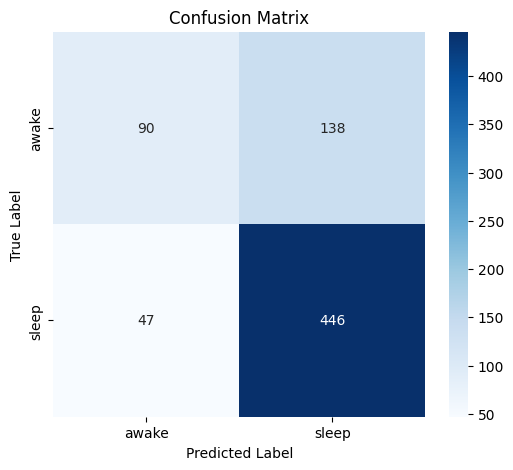

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(Y_test.reshape(-1), y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test.reshape(-1), y_pred)
print("Confusion Matrix:")
print(cm)

print("specificity:", cm[0, 0] / (cm[0, 0] + cm[0, 1]))

# plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['awake', 'sleep'], yticklabels=['awake', 'sleep'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")


In [31]:
21/(21+207)

0.09210526315789473